In [166]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

Erdos - Rényi-I (GNP)   # need to add edge weight

In [121]:
# value of n and p
n = np.random.randint(1000, 5000, size=None)
p = 1.2/(n-1)
seed = 12345
# generating the graph
GNP = nx.erdos_renyi_graph(n, p,seed=seed)

# Assign random weights to the edges
edge_weights = np.random.randint(0, 100, size=len(GNP.edges()))
edge_weights_dict = {(u, v): w for (u, v), w in zip(GNP.edges(), edge_weights)}
nx.set_edge_attributes(GNP, edge_weights_dict, name='weight')

# drawing the graph
#nx.draw(GNP, with_labels=True, node_color="tab:orange")

#pos = nx.spring_layout(GNP, seed=seed)
#plt.figure(figsize = (25, 25))

# showing graph on screen
#plt.show()

Erdos - Rényi-II (GNM)

In [130]:
n = np.random.randint(1000, 5000, size=None)  # 
m = np.random.randint(1.4,1.6, size=None)*n
seed = 12345  # seed random number generators for reproducibility

# Use seed for reproducibility
GNM = nx.gnm_random_graph(n, m, seed=seed)

pos = nx.spring_layout(GNM, seed=seed)  # Seed for reproducible layout
nx.draw(GNM, with_labels=True, node_color="tab:orange",pos=pos)
plt.show()

ValueError: low >= high

Watts-Strogatz

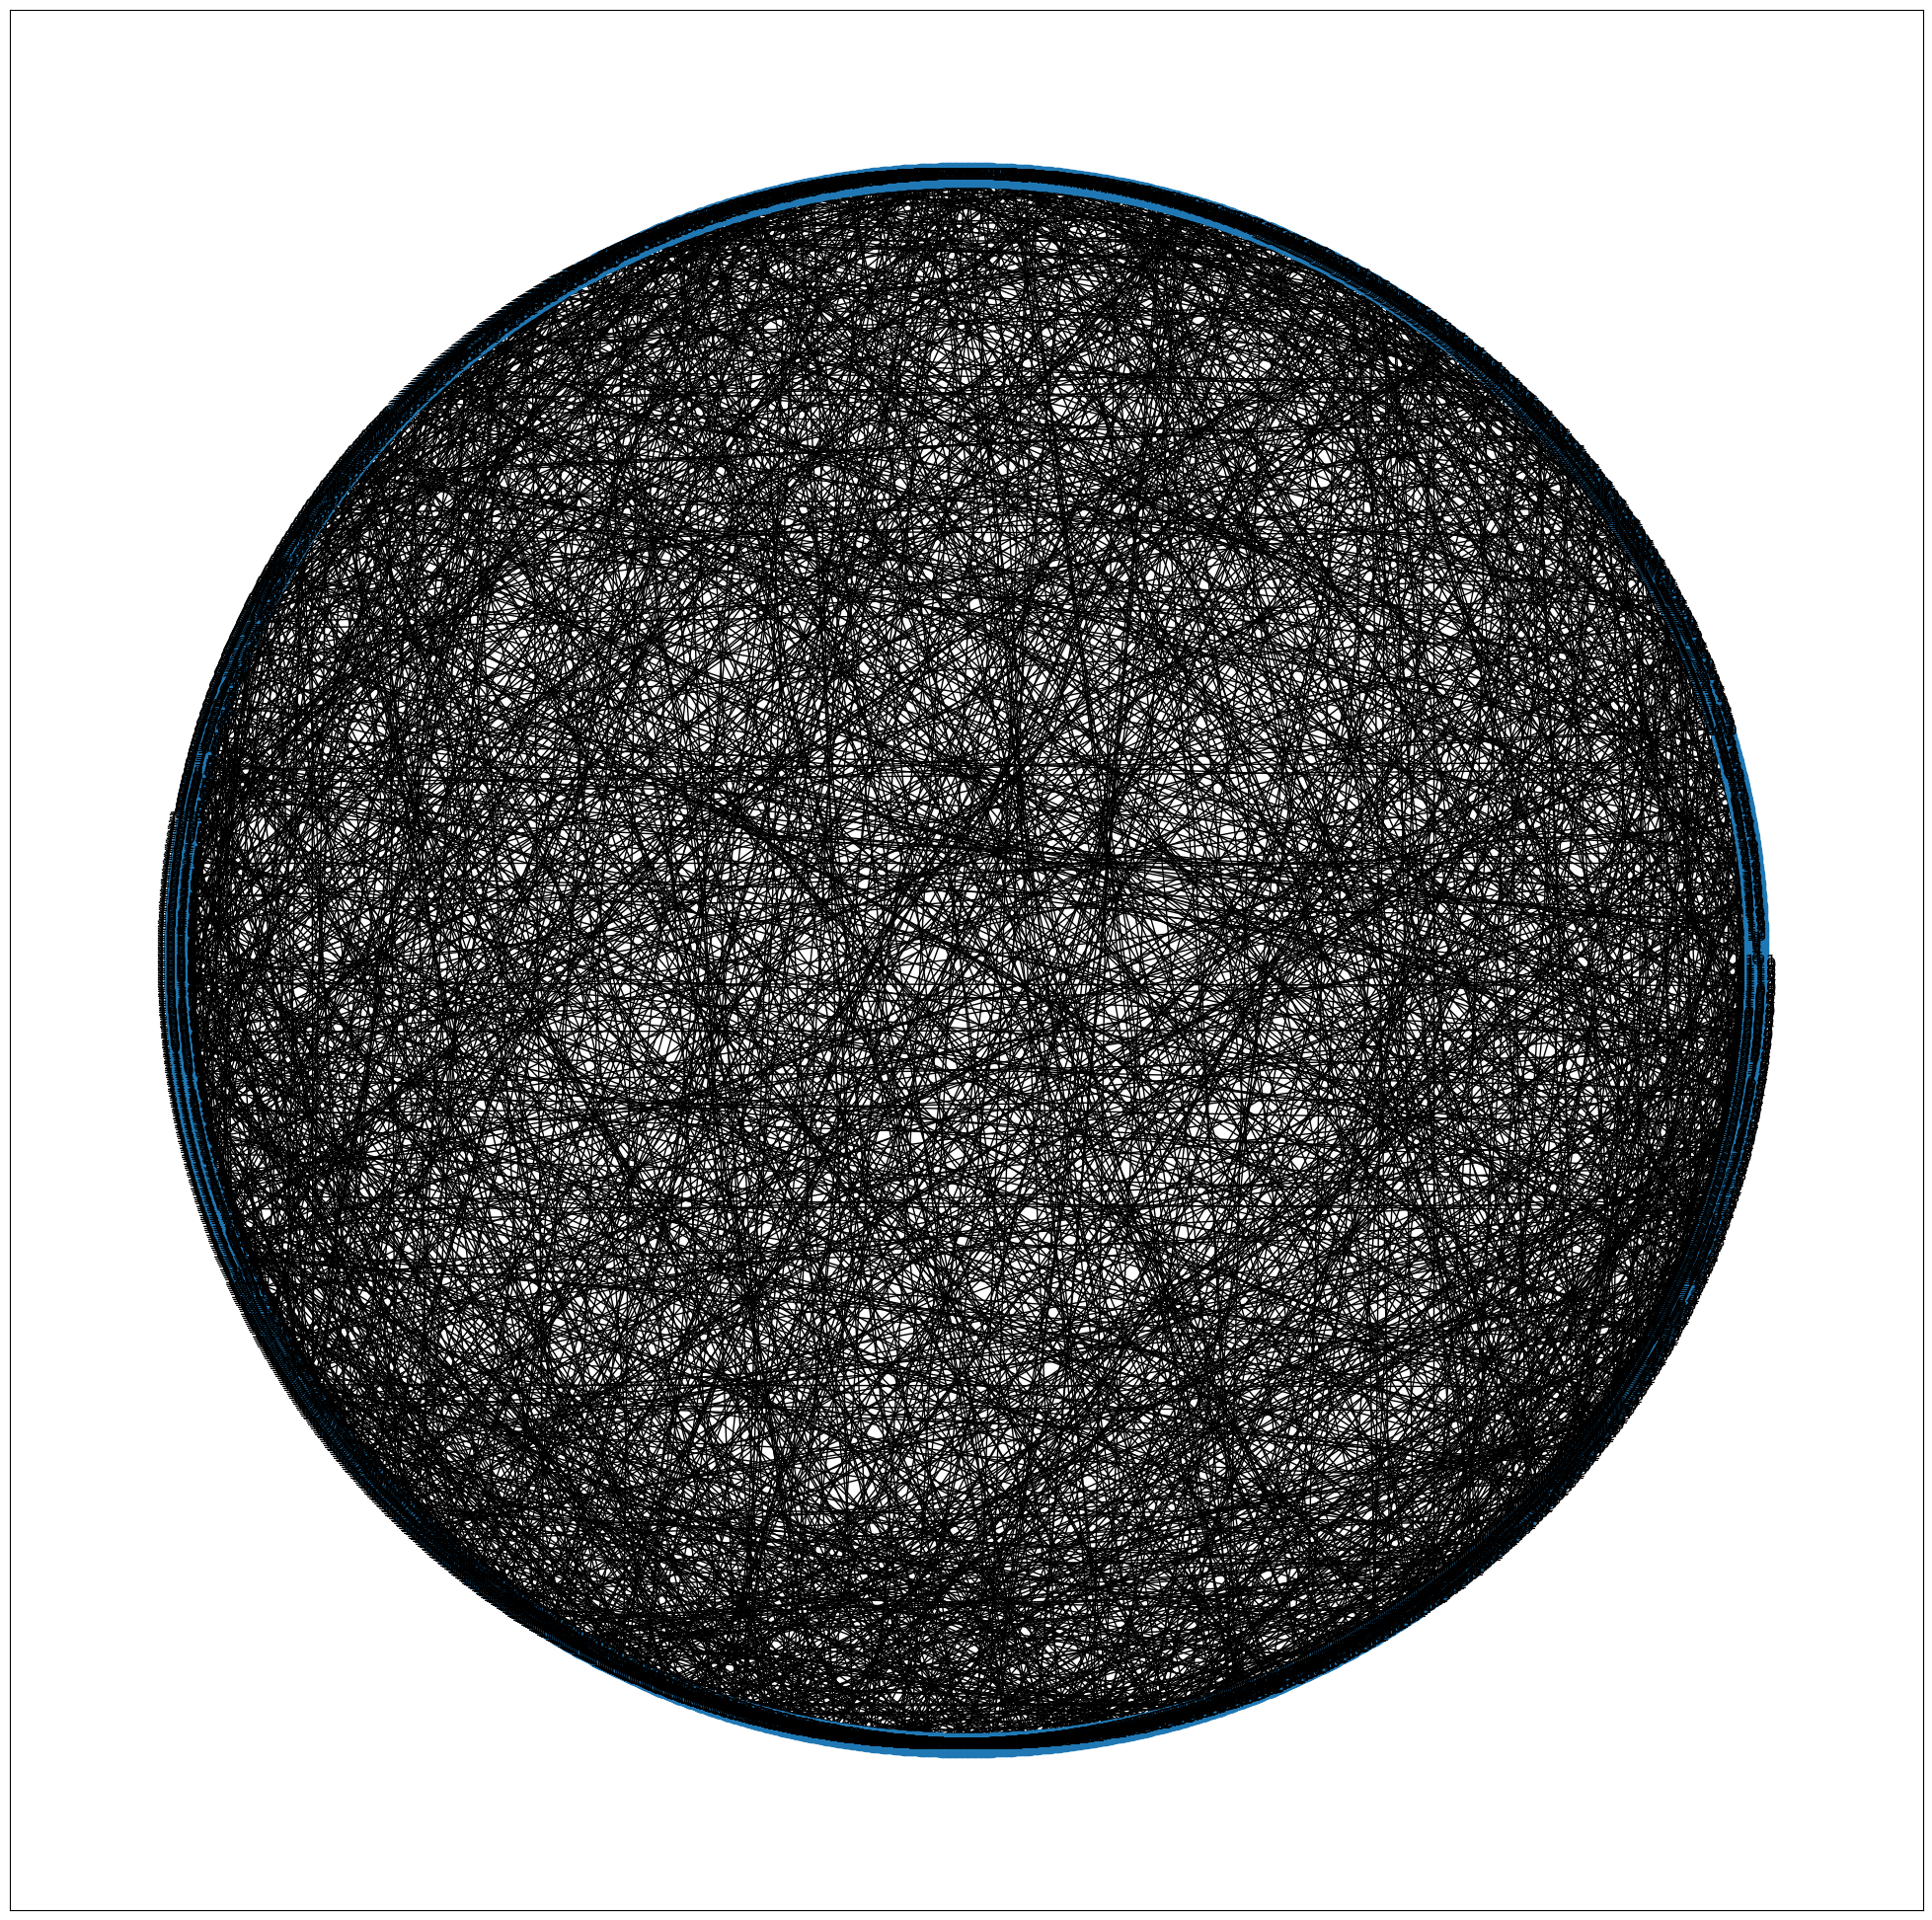

In [109]:
n = np.random.randint(2000, 4000, size=None)
m =4
p = 0.5
seed = 12345

WS = nx.watts_strogatz_graph(n, m, p)
pos = nx.circular_layout(WS)

plt.figure(figsize = (25, 25))
nx.draw_networkx(WS, pos)

Edge Betweenness Centrality(EBC)

In [32]:
b=nx.edge_betweenness_centrality(GNP,seed=seed)

In [50]:
b[(1, 951)]

0.00020525394934531164

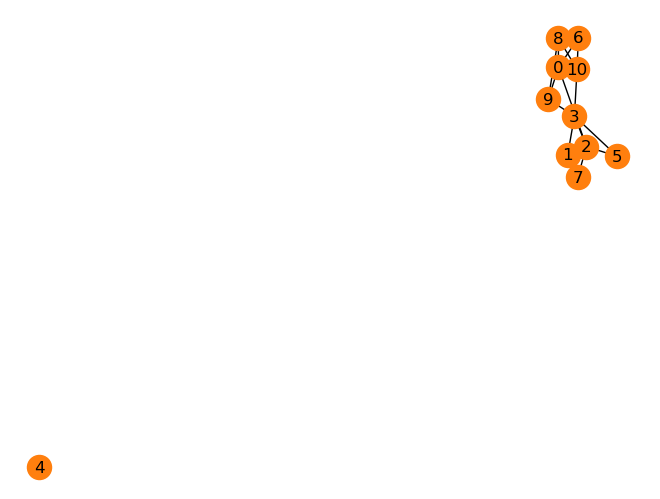

In [184]:
# value of n and p
n = 11
p = 0.2
seed = 12345
# generating the graph
GNP = nx.erdos_renyi_graph(n, p,seed=seed)

#edge_weights = np.random.randint(0, 100, size=len(GNP.edges()))
#edge_weights_dict = {(u, v): w for (u, v), w in zip(GNP.edges(), edge_weights)}
#nx.set_edge_attributes(GNP, edge_weights_dict, name='weight')

# drawing the graph
nx.draw(GNP, with_labels=True, node_color="tab:orange")

pos = nx.spring_layout(GNP, seed=seed)

# showing graph on screen
plt.show()

In [174]:
# Get the weight of a specific edge
#edge = (0, 2)
#nx.get_edge_attributes(GNP, 'weight')[edge]
#edge_weight = nx.get_edge_attributes(GNP, 'weight')[edge]

In [175]:
A = nx.adjacency_matrix(GNP)
print(A.todense())

[[0 0 1 0 0 0 1 0 1 1 0]
 [0 0 0 1 0 0 0 1 0 0 0]
 [1 0 0 1 0 1 0 1 0 0 0]
 [0 1 1 0 0 1 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 1]
 [0 1 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 1]
 [1 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 1 0 1 0 0]]


C:\Users\61433\AppData\Local\Temp\ipykernel_12132\2883760274.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(GNP)


In [176]:
GNP.edges

EdgeView([(0, 2), (0, 6), (0, 8), (0, 9), (1, 3), (1, 7), (2, 3), (2, 5), (2, 7), (3, 5), (3, 9), (3, 10), (6, 10), (8, 9), (8, 10)])

In [177]:
list(GNP.edges)[1:4]

[(0, 6), (0, 8), (0, 9)]

In [178]:
def get_edge_adjacency_matrix(edges):
    """
    Generates the edge adjacency matrix for an undirected graph given the list of edges
    """
    # Initialize an empty matrix of size num_edges x num_edges
    num_edges = len(edges)
    edge_adj_matrix = [[0 for j in range(num_edges)] for i in range(num_edges)]
    
    # Populate the matrix with 1s at positions corresponding to adjacent edges
    for i in range(num_edges):
        for j in range(i+1, num_edges):
            if edges[i][0] == edges[j][0] or edges[i][0] == edges[j][1] or edges[i][1] == edges[j][0] or edges[i][1] == edges[j][1]:
                edge_adj_matrix[i][j] = 1
                edge_adj_matrix[j][i] = 1
    
    return edge_adj_matrix

In [179]:
get_edge_adjacency_matrix(list(GNP.edges))

[[0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]]

In [140]:
#for row in get_edge_adjacency_matrix(7,list(GNP.edges)):
#    print(row)

In [180]:
def get_edge_adjacency_matrix_modified1(edges,degree):
    """
    Generates the edge adjacency matrix for an undirected graph given the list of edges
    """
    # Initialize an empty matrix of size num_edges x num_edges
    num_edges = len(edges)
    edge_adj_matrix = [[0 for j in range(num_edges)] for i in range(num_edges)]
    
    # Populate the matrix with 1s at positions corresponding to adjacent edges
    for i in range(num_edges):
        for j in range(i+1, num_edges):
            if edges[i][0] == edges[j][0]:
                edge_adj_matrix[i][j] = 1/ degree[edges[j][0]]
                edge_adj_matrix[j][i] = 1/ degree[edges[j][0]]
            if edges[i][0] == edges[j][1]:
                edge_adj_matrix[i][j] = 1/ degree[edges[j][1]]
                edge_adj_matrix[j][i] = 1/ degree[edges[j][1]]
            if edges[i][1] == edges[j][0]:
                edge_adj_matrix[i][j] = 1/ degree[edges[j][0]]
                edge_adj_matrix[j][i] = 1/ degree[edges[j][0]]
            if edges[i][1] == edges[j][1]:
                edge_adj_matrix[i][j] = 1/ degree[edges[j][1]]
                edge_adj_matrix[j][i] = 1/ degree[edges[j][1]]
    return edge_adj_matrix

In [181]:
get_edge_adjacency_matrix_modified1(list(GNP.edges),GNP.degree())

[[0, 0.25, 0.25, 0.25, 0, 0, 0.25, 0.25, 0.25, 0, 0, 0, 0, 0, 0],
 [0.25, 0, 0.25, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0],
 [0.25,
  0.25,
  0,
  0.25,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.3333333333333333,
  0.3333333333333333],
 [0.25,
  0.25,
  0.25,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.3333333333333333,
  0,
  0,
  0.3333333333333333,
  0],
 [0, 0, 0, 0, 0, 0.5, 0.2, 0, 0, 0.2, 0.2, 0.2, 0, 0, 0],
 [0, 0, 0, 0, 0.5, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0],
 [0.25, 0, 0, 0, 0.2, 0, 0, 0.25, 0.25, 0.2, 0.2, 0.2, 0, 0, 0],
 [0.25, 0, 0, 0, 0, 0, 0.25, 0, 0.25, 0.5, 0, 0, 0, 0, 0],
 [0.25, 0, 0, 0, 0, 0.5, 0.25, 0.25, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0.2, 0, 0.2, 0.5, 0, 0, 0.2, 0.2, 0, 0, 0],
 [0,
  0,
  0,
  0.3333333333333333,
  0.2,
  0,
  0.2,
  0,
  0,
  0.2,
  0,
  0.2,
  0,
  0.3333333333333333,
  0],
 [0,
  0,
  0,
  0,
  0.2,
  0,
  0.2,
  0,
  0,
  0.2,
  0.2,
  0,
  0.3333333333333333,
  0,
  0.3333333333333333],
 [0,
  0.5,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

In [182]:
def get_edge_adjacency_matrix_modified2(edges,model):
    """
    Generates the edge adjacency matrix for an undirected graph given the list of edges
    """
    # Initialize an empty matrix of size num_edges x num_edges
    num_edges = len(edges)
    edge_adj_matrix = [[0 for j in range(num_edges)] for i in range(num_edges)]
    
    # Populate the matrix with 1s at positions corresponding to adjacent edges
    for i in range(num_edges):
        for j in range(i+1, num_edges):
            if edges[i][0] == edges[j][0] or edges[i][0] == edges[j][1] or edges[i][1] == edges[j][0] or edges[i][1] == edges[j][1]:
                edge_adj_matrix[i][j] = 1/ (nx.get_edge_attributes(model, 'weight')[edges[i]]+nx.get_edge_attributes(model, 'weight')[edges[i]])
                edge_adj_matrix[j][i] = 1/ (nx.get_edge_attributes(model, 'weight')[edges[i]]+nx.get_edge_attributes(model, 'weight')[edges[i]])
                
    return edge_adj_matrix

In [ ]:
#(nx.get_edge_attributes(graph, 'weight')[edge[i]]+nx.get_edge_attributes(graph, 'weight')[edge[i]])

In [185]:
get_edge_adjacency_matrix_modified2(list(GNP.edges),GNP)

C:\Users\61433\AppData\Local\Temp\ipykernel_12132\2252096168.py:13: RuntimeWarning: divide by zero encountered in long_scalars
  edge_adj_matrix[i][j] = 1/ (nx.get_edge_attributes(model, 'weight')[edges[i]]+nx.get_edge_attributes(model, 'weight')[edges[i]])
C:\Users\61433\AppData\Local\Temp\ipykernel_12132\2252096168.py:14: RuntimeWarning: divide by zero encountered in long_scalars
  edge_adj_matrix[j][i] = 1/ (nx.get_edge_attributes(model, 'weight')[edges[i]]+nx.get_edge_attributes(model, 'weight')[edges[i]])


[[0, 0.05, 0.05, 0.05, 0, 0, 0.05, 0.05, 0.05, 0, 0, 0, 0, 0, 0],
 [0.05,
  0,
  0.013513513513513514,
  0.013513513513513514,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.013513513513513514,
  0,
  0],
 [0.05,
  0.013513513513513514,
  0,
  0.00847457627118644,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.00847457627118644,
  0.00847457627118644],
 [0.05,
  0.013513513513513514,
  0.00847457627118644,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.01,
  0,
  0,
  0.01,
  0],
 [0,
  0,
  0,
  0,
  0,
  0.00684931506849315,
  0.00684931506849315,
  0,
  0,
  0.00684931506849315,
  0.00684931506849315,
  0.00684931506849315,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0.00684931506849315,
  0,
  0,
  0,
  0.005208333333333333,
  0,
  0,
  0,
  0,
  0,
  0],
 [0.05,
  0,
  0,
  0,
  0.00684931506849315,
  0,
  0,
  0.012195121951219513,
  0.012195121951219513,
  0.012195121951219513,
  0.012195121951219513,
  0.012195121951219513,
  0,
  0,
  0],
 [0.05,
  0,
  0,
  0,
  0,
  0,
  0.0121951219512195